# Observations and Insights 


      1) The correlation coefficient between mouse weight, and average tumor volume is 0.84. It is a strong positive 
         correlation, when the mouse weight increases the average tumor volume also increases.
        
      2) Capomulin treatment of mouse is found to be more effective, as the average tumor volume is decreased over time
         for 1509 mouse ID.
        
      3) Of the 4 drug regimens we analyzed, Capomulin and Ramicane were the most effective at decreasing tumor size. 
         The least effective were the other two drugs Infubinol and Ceftamin.
        
      4) The results of the study are very consistent, as there is only one outlier(drug regimen: Infubinol).
  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
mouse_study_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID","Mouse ID"])

# Display the data table for preview
mouse_study_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_number = mouse_study_complete["Mouse ID"].nunique()
print(f'The number of unique Mouse IDs listed in the study are {mice_number}')

The number of unique Mouse IDs listed in the study are 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_complete.loc[mouse_study_complete.duplicated(subset = ["Mouse ID","Timepoint"], keep = False)\
                                          ,"Mouse ID"].unique
duplicate_mice


<bound method Series.unique of 908    g989
909    g989
910    g989
911    g989
912    g989
913    g989
914    g989
915    g989
916    g989
917    g989
Name: Mouse ID, dtype: object>

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = mouse_study_complete.loc[mouse_study_complete["Mouse ID"]=="g989",:]
duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_complete.loc[(mouse_study_complete["Mouse ID"] != "g989")]
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mice = clean_df["Mouse ID"].nunique()
print(f'The number of mice in the clean DataFrame : {new_mice}')

The number of mice in the clean DataFrame : 248


## Summary Statistics

In [7]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumor_volume = clean_df.groupby("Drug Regimen")
    
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_mean = tumor_volume["Tumor Volume (mm3)"].mean()

tumor_volume_median = tumor_volume["Tumor Volume (mm3)"].median()

tumor_volume_variance = tumor_volume["Tumor Volume (mm3)"].var()

tumor_volume_stddev = tumor_volume["Tumor Volume (mm3)"].std()

tumor_volume_sem = tumor_volume["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean" :tumor_volume_mean, "Median" : tumor_volume_median, \
                           "Variance" :tumor_volume_variance, "Standard deviation" : tumor_volume_stddev, \
                           "SEM" : tumor_volume_sem})
summary_df

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_df = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
tumor_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

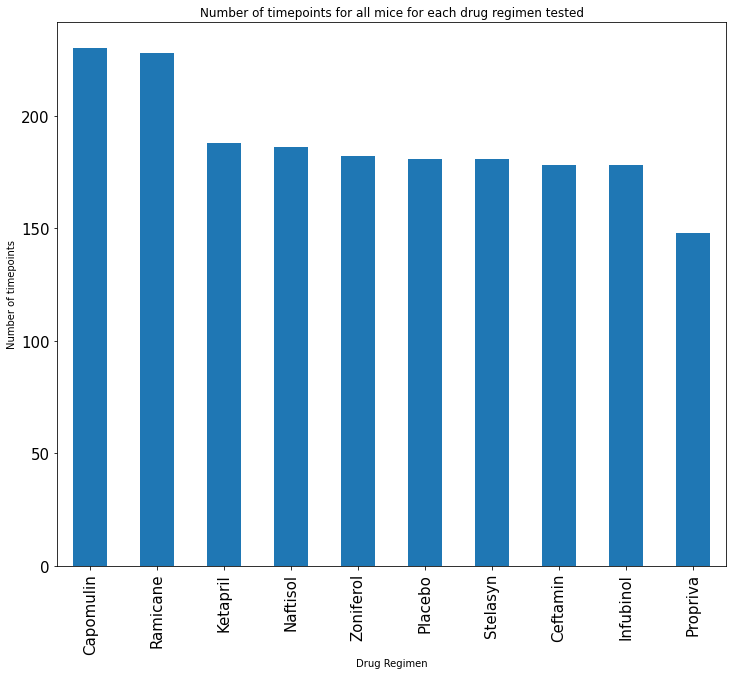

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint = clean_df.groupby(["Drug Regimen"])["Timepoint"].count()

bar_chart = timepoint.sort_values(ascending=False).plot.bar(figsize=(12,10), fontsize=15, ylabel="Number of timepoints",\
                                                    title="Number of timepoints for all mice for each drug regimen tested")

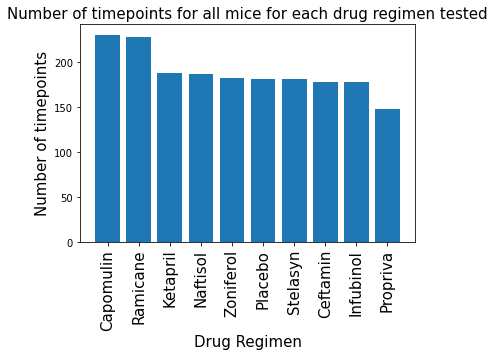

In [25]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint = clean_df.groupby(["Drug Regimen"])["Timepoint"].count()

timepoint_desc = timepoint.sort_values(ascending=False)

x_axis =  (timepoint_desc.index)

plt.bar(x_axis, timepoint_desc.values, align="center" )

plt.xticks(rotation="vertical", fontsize=15)

plt.ylabel("Number of timepoints", fontsize=15)

plt.title("Number of timepoints for all mice for each drug regimen tested", fontsize = 15)

plt.xlabel("Drug Regimen", fontsize = 15)



plt.show()

<AxesSubplot:title={'center':'Distribution of Mice by sex'}, ylabel='Sex'>

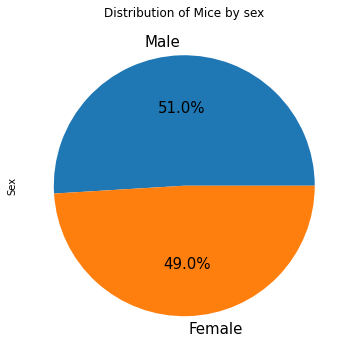

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_df["Sex"].value_counts().plot.pie(figsize=(6,6), autopct="%1.1f%%", \
                                        fontsize = 15 ,title = "Distribution of Mice by sex")

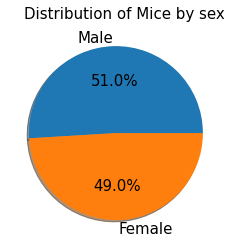

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data = clean_df["Sex"].value_counts()

data_labels = ["Male", "Female"]

plt.pie(data, labels=data_labels, shadow=True, radius = 1.0, textprops ={"fontsize":15} ,autopct = "%1.1f%%")

plt.title("Distribution of Mice by sex", fontsize=15, loc="right")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# capomulin_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
# capomulin_df = 

# Start by getting the last (greatest) timepoint for each mouse
timepoint_max = clean_df.groupby(["Mouse ID"])["Timepoint"].max()#.sort_values().reset_index().rename(columns={'Timepoint': 'max_timepoint'})

# timepoint_max.rename
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_df = pd.merge(clean_df, timepoint_max, on=("Mouse ID","Timepoint"))
tumor_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvol_cap = []
tumorvol_ram = []
tumorvol_inf = []
tumorvol_cef = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
  
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in tumor_df.iterrows():
    if row["Drug Regimen"]=="Capomulin":
        tumorvol_cap.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"]==treatments[1]:
        tumorvol_ram.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"]==treatments[2]:
        tumorvol_inf.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"]==treatments[3]:
        tumorvol_cef.append(row["Tumor Volume (mm3)"])
        
# create a dataframe to storre the values
treatment_df = pd.DataFrame({"Capomulin": tumorvol_cap,
                       treatments[1]: tumorvol_ram,
                       treatments[2]: tumorvol_inf,
                       treatments[3]: tumorvol_cef
                       })
treatment_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,23.343598,22.050126,67.973419,62.999356
1,28.484033,29.128472,65.525743,45.000000
2,28.430964,30.276232,57.031862,56.057749
3,30.485985,30.564625,66.083066,55.742829
4,31.023923,30.638696,72.226731,48.722078
5,31.896238,31.560470,36.321346,47.784682
6,32.377357,31.095335,60.969711,61.849023
7,33.329098,33.397653,62.435404,68.923185
8,34.455298,32.978522,60.918767,67.748662
9,37.311846,33.562402,67.289621,57.918381


In [17]:
# Calculate the IQR
quart_cap = treatment_df[treatments[0]].quantile([0.25, 0.5, 0.75])
low_cap = quart_cap[0.25]
upper_cap = quart_cap[0.75]
iqr = upper_cap-low_cap
print(f'IQR for Capomulin :{iqr}')
lower_bound = low_cap - (1.5*iqr)
upper_bound = upper_cap + (1.5*iqr)
print(f"Values below {lower_bound:.2f} could be outliers.")
print(f"Values above {upper_bound:.2f} could be outliers.")



quart_ram = treatment_df[treatments[1]].quantile([0.25, 0.5, 0.75])
low_ram = quart_ram[0.25]
upper_ram = quart_ram[0.75]
iqr = upper_ram-low_ram
print(f'IQR for Ramicane :{iqr}')
lower_bound = low_ram - (1.5*iqr)
upper_bound = upper_ram + (1.5*iqr)
print(f"Values below {lower_bound:.2f} could be outliers.")
print(f"Values above {upper_bound:.2f} could be outliers.")



quart_inf = treatment_df[treatments[2]].quantile([0.25, 0.5, 0.75])
low_inf = quart_inf[0.25]
upper_inf = quart_inf[0.75]
iqr = upper_cap-low_cap
print(f'IQR for Infubinol :{iqr}')
lower_bound = low_inf - (1.5*iqr)
upper_bound = upper_inf + (1.5*iqr)
print(f"Values below {lower_bound:.2f} could be outliers.")
print(f"Values above {upper_bound:.2f} could be outliers.")



quart_cef = treatment_df[treatments[3]].quantile([0.25, 0.5, 0.75])
low_cef = quart_cef[0.25]
upper_cef = quart_cef[0.75]
iqr = upper_cef-low_cef
print(f'IQR for Ceftamin :{iqr}')
lower_bound = low_cef - (1.5*iqr)
upper_bound = upper_cef + (1.5*iqr)
print(f"Values below {lower_bound:.2f} could be outliers.")
print(f"Values above {upper_bound:.2f} could be outliers.")


    
 

IQR for Capomulin :7.781863460000004
Values below 20.70 could be outliers.
Values above 51.83 could be outliers.
IQR for Ramicane :9.098536719999998
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
IQR for Infubinol :7.781863460000004
Values below 42.38 could be outliers.
Values above 77.20 could be outliers.
IQR for Ceftamin :15.577752179999997
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.


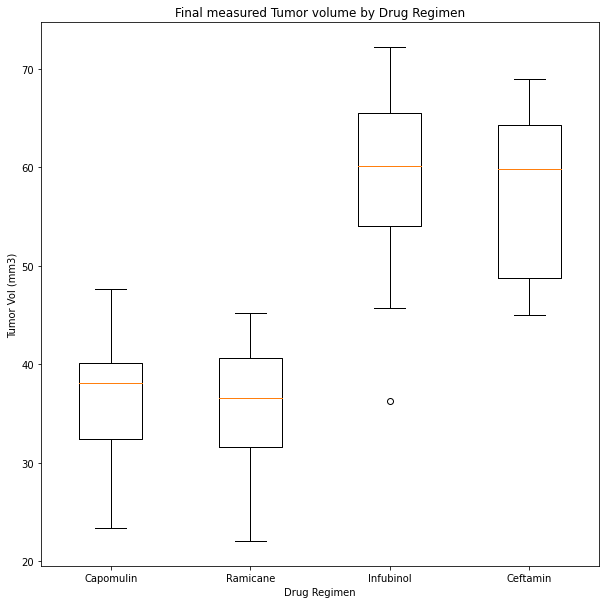

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drugregimen_list = [treatment_df[treatments[0]],
                treatment_df[treatments[1]],
                treatment_df[treatments[2]],
                treatment_df[treatments[3]]
               ]
# used plt.subplots to define size
fig1, ax = plt.subplots(figsize=(10,10))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen') 
ax.set_ylabel('Tumor Vol (mm3)')

# used ax.plot function and ran the parameter boxplot_list to create the boxplot
ax.boxplot(drugregimen_list)

# set labels of each boxplot
plt.xticks([1,2,3,4], treatments) 

plt.show()


## Line and Scatter Plots

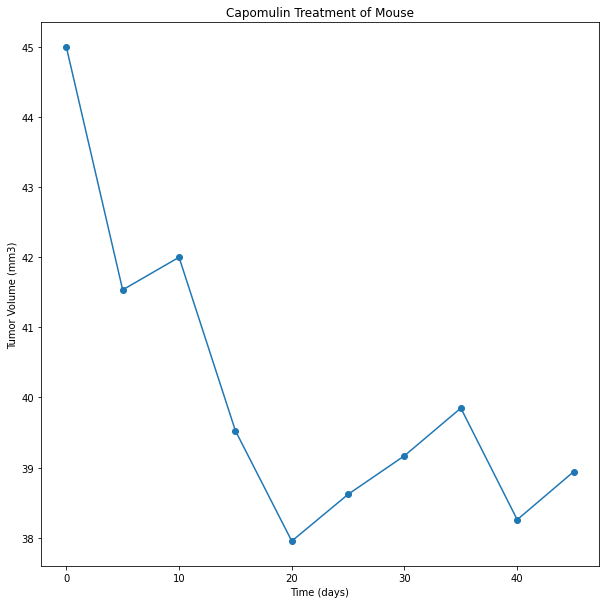

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
lineplot_df = clean_df.loc[clean_df["Mouse ID"]=="b742"]


fig1,ax1 = plt.subplots(figsize=(10,10))
plt.plot(lineplot_df['Timepoint'], lineplot_df['Tumor Volume (mm3)'], marker = 'o')

plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse")

plt.show()

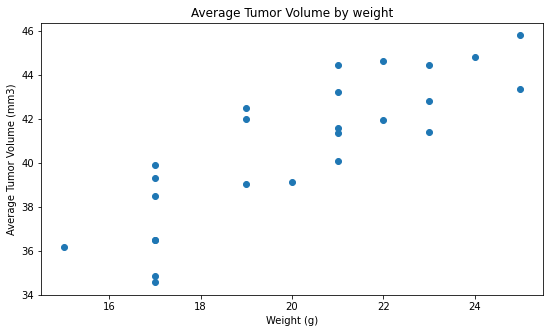

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# calculate the values
scatter_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:]

data_mean = scatter_df.groupby(["Mouse ID"]).mean()

# scatter plot
fig1, ax1 = plt.subplots(figsize=(9, 5))

plt.scatter(data_mean["Weight (g)"], data_mean["Tumor Volume (mm3)"])

plt.xlabel("Weight (g)")

plt.ylabel("Average Tumor Volume (mm3)")

plt.title("Average Tumor Volume by weight")

plt.show()

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
scatter_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:]

data_mean = scatter_df.groupby(["Mouse ID"]).mean()

x_axis = data_mean["Weight (g)"]

y_axis = data_mean["Tumor Volume (mm3)"]

corr_coeff = st.pearsonr(x_axis,y_axis)

# Calculate the correlation coefficient between mouse weight and average tumor volume
print(f'The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen \
is {round(corr_coeff[0],2)}')



The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


slope:0.9544396890241049
intercept:21.552160532685008
rvalue (Correlation coefficient):0.8419363424694721
stderr:0.12754359033201323
y = 0.95x + 21.55


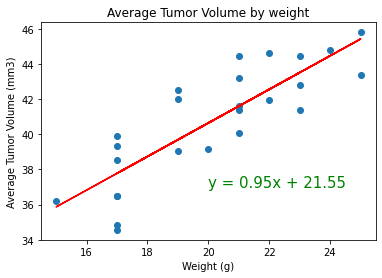

In [22]:
# calculate the Linear regression
cap_slope, cap_int, cap_r, cap_p, cap_std_err = stats.linregress(x_axis, y_axis)

cap_regress = cap_slope * x_axis + cap_int

print(f"slope:{cap_slope}")

print(f"intercept:{cap_int}")

print(f"rvalue (Correlation coefficient):{cap_r}")

print(f"stderr:{cap_std_err}")

line_eq = "y = " + str(round(cap_slope,2)) + "x + " + str(round(cap_int,2))

print(line_eq)

# Plot the linear regression
plt.scatter(x_axis, y_axis)

plt.plot(x_axis, cap_regress, "r-")

# Annotate linear regression
plt.annotate(line_eq, (20,37), fontsize=15, color="green")

# Add labels
plt.xlabel("Weight (g)")

plt.ylabel("Average Tumor Volume (mm3)")

plt.title("Average Tumor Volume by weight")

plt.show()
